In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import pandas as pd

In [5]:
# We'll start by reading in the corpus, which preserves word order

data = pd.read_pickle("/content/drive/MyDrive/project_rap/data_clean_df.pkl")
data['name'] = ['Eminem','Jay Z','Kanye West', 'Kendrick Lamar','Tupac']
data

,lyrics,name
Eminem,this is another public service announcement b...,Eminem
Jay Z,ah shit okay okay alright big man you wanna ...,Jay Z
Kanye West,uhh uhh uhh uhh good morning good morning...,Kanye West
Kendrick Lamar,lord god i come to you a sinner and i humbly ...,Kendrick Lamar
Tupac,at am wednesday was on his way into a time ...,Tupac


In [6]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['lyrics'].apply(pol)
data['subjectivity'] = data['lyrics'].apply(sub)
data

,lyrics,name,polarity,subjectivity
Eminem,this is another public service announcement b...,Eminem,-0.084004,0.474368
Jay Z,ah shit okay okay alright big man you wanna ...,Jay Z,0.016677,0.538587
Kanye West,uhh uhh uhh uhh good morning good morning...,Kanye West,0.160286,0.461358
Kendrick Lamar,lord god i come to you a sinner and i humbly ...,Kendrick Lamar,0.039962,0.493729
Tupac,at am wednesday was on his way into a time ...,Tupac,0.050938,0.524455


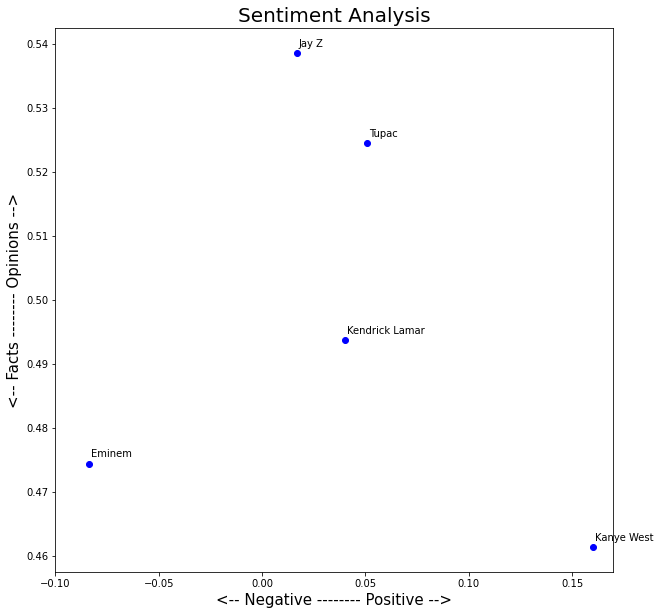

In [7]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, rapper in enumerate(data.index):
    x = data.polarity.loc[rapper]
    y = data.subjectivity.loc[rapper]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['name'][index], fontsize=10)
    plt.xlim(-.10, .17) 
     
#plt.vlines(0, ymin=0, ymax=1)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [8]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [9]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.lyrics:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[[' this is another public service announcement brought to you in part by slim shady tell em i dont give a fuck slim shady does not give a fuck what you think tell em to suck it if you dont like it you can suck his fucking cock tell em they kissed my ass little did you know upon purchasing this album you have just kissed his ass tell em im fed up slim shady is fed up with your shit and hes going to kill you yeah aanything else yeah sue  urlcopyembedcopy    when i was just a little baby boy my momma used to tell me these crazy things she used to tell me my daddy was an evil man she used to tell me he hated me but then i got a little bit older and i realized she was the crazy one but there was nothing i could do or say to try to change it cause thats just the way she was   they said i cant rap about being broke no more they aint say i cant rap about coke no more ahh slut you think i wont choke no whore til them vocal cords dont work in her throat no more ahh these motherfuckers are think

In [10]:
# The list has 10 elements, one for each transcript
len(list_pieces)

5

In [11]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [12]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[-0.2410829838564214,
  -0.1923941798941799,
  -0.09423044217687075,
  -0.07089871933621934,
  -0.10029168362501693,
  -0.08351322751322751,
  0.001068121693121682,
  -0.054818956763401205,
  -0.018606730571016288,
  -0.014454736440030565],
 [0.010800288600288597,
  -0.08751705365341728,
  -0.07160240800865803,
  -0.045720632248410026,
  0.11525355596784168,
  0.08360600781332488,
  0.25719887955182075,
  -0.021769443708219236,
  0.05828747523662778,
  -0.1019148936170213],
 [0.30910081204198847,
  -0.011191460055096419,
  0.1362977602108037,
  0.22490842490842494,
  0.058229166666666665,
  0.13784736768607736,
  0.05095238095238095,
  -0.25,
  0.0,
  0.1070707070707071],
 [-0.01601538379316157,
  0.029547709235209236,
  0.01789701526543631,
  0.033165922619047605,
  0.029874478641601955,
  0.10340772443045171,
  0.09095796676441834,
  0.09644948449296276,
  0.01039974105042598,
  0.0007467532467532505],
 [-0.07065295815295818,
  -0.0568870523415978,
  0.11362126245847175,
  0.0378693

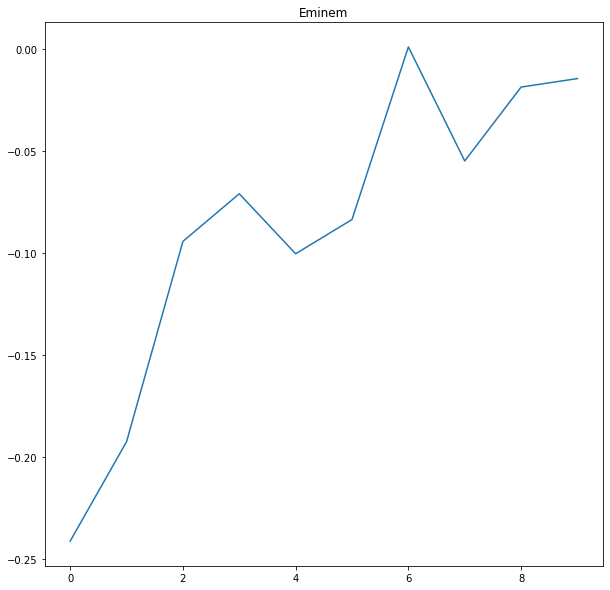

In [13]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['name'].index[0])
plt.show()

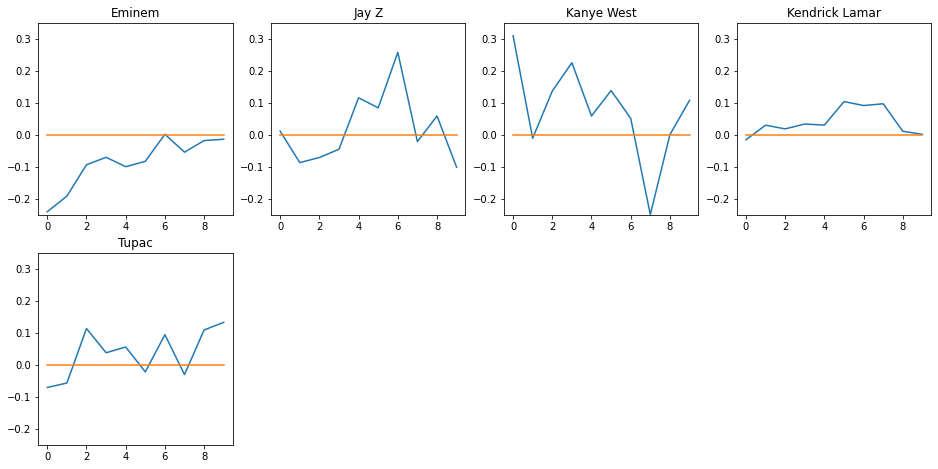

In [14]:
# Show the plot for all rapper
plt.rcParams['figure.figsize'] = [16, 12]

for index, rapper in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['name'][index])
    plt.ylim(ymin=-.25, ymax=.35)
    
plt.show()